In [1]:
import seaborn as sns
sns.set()

In [2]:
from Twitter.analysis.data_prediction_ml import *

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
BASE_FOLDER = "../../data/processed_tweets/"

num_vars = ['followers', 'following', 'tweet_count', 'seniority']
cat_vars = ['topics', 'sentiment', 'hashtags', 'verified', 'day_phase', 'day_of_week', 'month']
cat_vars_enc = ['topics_ids', 'sentiment_enc', 'hashtags_enc', 'verified_enc', 'day_phase_enc', 'day_of_week_enc', 'month_enc']


In [5]:
train_df, test_df = get_test_train_data(BASE_FOLDER, False)

['tweets_2019.csv', 'tweets_2020.csv', 'tweets_2021.csv']


In [6]:
train_df = prepare_model_data(train_df)
test_df = prepare_model_data(test_df)

In [7]:
X_train, y_train, X_test, y_test = split_data(train_df, test_df)

(383207, 72)
(383207,)
(174108, 72)
(174108,)


In [ ]:
cat_vars_encoded = process_categorical_vars(X_train)

## Standardization

In [11]:
X_train_cats, X_train_num_scaled, X_test_num_scaled = standardize(cat_vars_encoded, X_train, X_test)

## Feature Selection

In [12]:
num_feat_to_keep = pd.DataFrame(index=X_train_cats.columns)
cat_feat_to_keep = pd.DataFrame(index=X_train_num_scaled.columns)

### Categorical variables selection

#### Chi-square

In [13]:
chi_analysis(cat_feat_to_keep, X_train_cats, y_train)

Chi-square analysis


### Numerical variables selection

#### ANOVA

In [14]:
anova_analysis(num_feat_to_keep, X_train_num_scaled, y_train)

ANOVA analysis


#### Tree-based

In [15]:
tree_analysis(num_feat_to_keep, X_train_num_scaled, y_train)

Tree based analysis


#### LASSO Regression

In [16]:
lasso_analysis(num_feat_to_keep, X_train_num_scaled, y_train)

Lasso analysis


#### Recursive Feature Elimination

In [17]:
rfe_analysis(num_feat_to_keep, X_train_num_scaled, y_train)

Recursive feature extraction analysis


### Final variables

In [18]:
num_feat_to_keep['Discard Nr'] = num_feat_to_keep.apply(lambda x: x.str.findall('Discard').str.len()).sum(axis = 1).astype(int)
num_feat_to_keep

,ANOVA,Trees,Lasso Regression,RFE,Discard Nr
topics_cleaned_Brand,Discard,Discard,Discard,Discard,4
topics_cleaned_Entities,Discard,Discard,Discard,Discard,4
topics_cleaned_Holiday,Discard,Discard,Discard,Discard,4
topics_cleaned_Interest and Hobbies,Discard,Discard,Discard,Discard,4
topics_cleaned_Music,Discard,Discard,Discard,Discard,4
topics_cleaned_Other,Discard,Discard,Discard,Discard,4
topics_cleaned_Person,Discard,Discard,Discard,Discard,4
topics_cleaned_Political,Discard,Discard,Discard,Discard,4
topics_cleaned_Sport,Discard,Discard,Discard,Discard,4
topics_cleaned_TV and Movies,Discard,Discard,Discard,Discard,4


In [19]:
cat_feat_to_keep['Discard Nr'] = cat_feat_to_keep.apply(lambda x: x.str.findall('Discard').str.len()).sum(axis = 1).astype(int)
cat_feat_to_keep

,Chi2,Discard Nr
followers,Discard,1
following,Discard,1
tweet_count,Discard,1
seniority,Discard,1
topics_cleaned_Entities,Keep,0
topics_cleaned_Sport,Keep,0
topics_cleaned_News,Keep,0
sentiment_Neutral,Keep,0
sentiment_Positive,Keep,0
hashtags_True,Keep,0


In [20]:
cat_to_keep = cat_feat_to_keep[cat_feat_to_keep['Discard Nr'] < 1].index.tolist()
num_to_keep = num_feat_to_keep[num_feat_to_keep['Discard Nr'] < 3].index.to_list()
print(cat_to_keep + num_to_keep)

['topics_cleaned_Entities', 'topics_cleaned_Sport', 'topics_cleaned_News', 'sentiment_Neutral', 'sentiment_Positive', 'hashtags_True', 'verified_True', 'day_phase_Dusk', 'day_phase_Morning', 'month_December', 'followers', 'following', 'seniority', 'tweet_count']


In [21]:
X_train = X_train[cat_to_keep].copy()
X_train[num_to_keep] = X_train_num_scaled[num_to_keep]

In [22]:
X_test = X_test[cat_to_keep].copy()
X_test[num_to_keep] = X_test_num_scaled[num_to_keep]

## Balacing the dataset

### SMOTE Method

In [23]:
X_train, y_train = balance_dataset(X_train, y_train)

Before over sampling:  Counter({0: 322530, 1: 60677})
After over sampling:  Counter({1: 322530, 0: 322530})


## Models

LR: 0.339167 (0.112824)
LDA: 0.292867 (0.093540)
CART: 0.623052 (0.036662)
NB: 0.566304 (0.261888)
AB: 0.477887 (0.068491)
GBM: 0.489810 (0.051305)
RFC: 0.714309 (0.028483)
ET: 0.747357 (0.030037)


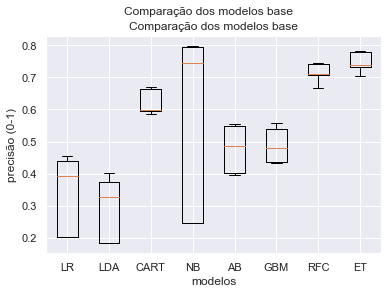

<Figure size 1800x1296 with 0 Axes>

In [24]:
models = [('LR', LogisticRegression(solver='lbfgs')), ('LDA', LinearDiscriminantAnalysis()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()),
          ('AB', AdaBoostClassifier()), ('GBM', GradientBoostingClassifier()), ('RFC', RandomForestClassifier(n_estimators=100)), ('ET', ExtraTreesClassifier())]
num_folds = 5
seed = 7
scoring = 'accuracy'
best_base_model, names, results = compare_base_models(models, X_train, y_train, scoring, num_folds)
algorithm_comparison_chart('Comparação dos modelos base', 'modelos', 'precisão (0-1)', names, results, False)

## Hyperparameter Optimization

In [26]:
optimized_model = get_optimized_model(ExtraTreesClassifier, False, X_train, y_train)

## Test final model

In [27]:
train_evaluate_save(optimized_model, X_train, y_train, X_test, y_test)

Model Performance
Accuracy: 0.76%
              precision    recall  f1-score   support

 Não popular       0.89      0.81      0.85    145295
     Popular       0.34      0.51      0.41     28813

    accuracy                           0.76    174108
   macro avg       0.62      0.66      0.63    174108
weighted avg       0.80      0.76      0.77    174108



FileNotFoundError: [Errno 2] No such file or directory: '../data/models/popularity.joblib'